In [1]:
#READING NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import  LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
#READING DATASET

df = pd.read_csv('car.csv', encoding='utf-8')
print(df.info())

#how many rows and features 
rows, features=df.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


In [3]:
#PREPROCESSING


#replace different types of missing values with NaN


df.replace(
    to_replace=["", " ", "NA", "null", "None", "N/A", "missing"],
    value=np.nan,
    inplace=True
)

#drop columns where target is null
target_col = 'class'  
df = df[df[target_col].notna()]

#make separate dataframes for features and target variable
df_features = df.drop(columns=[target_col])
df_target = df[target_col]

#splitting the columns of features dataset into numerical and categorical features

numerical_features = df_features.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df_features.select_dtypes(include=['object', 'category']).columns.tolist()

    

In [4]:
#SPLITTING DATASET INTO TRAIN AND TEST SETS

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42)



In [5]:
# setting up imputer to handle missing values
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# handle missing values
if numerical_features:
    X_train[numerical_features] = numerical_imputer.fit_transform(X_train[numerical_features])
    X_test[numerical_features] = numerical_imputer.transform(X_test[numerical_features])

if categorical_features:
    df_features[categorical_features] = categorical_imputer.fit_transform(df_features[categorical_features])

# Encoding categorical features using LabelEncoder (in-place)
if categorical_features:
    for col in categorical_features:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

# Encoding target variable if categorical
if df_target.dtype == 'object' or str(df_target.dtype) == 'category':
    target_encoder = LabelEncoder()
    y_train_encoded = target_encoder.fit_transform(y_train.astype(str))
    y_test_encoded = target_encoder.transform(y_test.astype(str))

    y_train = pd.Series(y_train_encoded, name='y_train')
    y_test = pd.Series(y_test_encoded, name='y_test')

    inverse_mapping = {idx: label for idx, label in enumerate(target_encoder.classes_)}


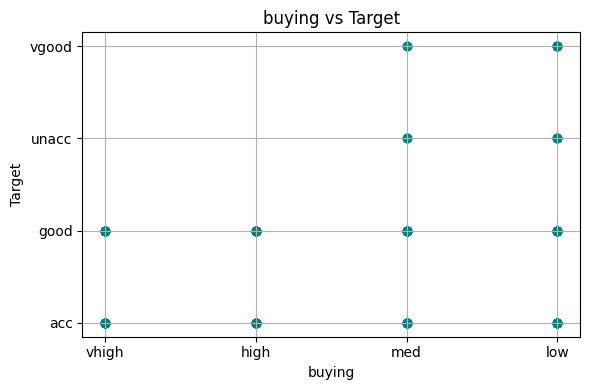

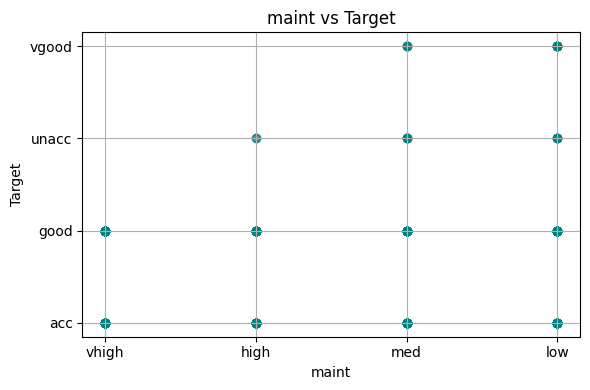

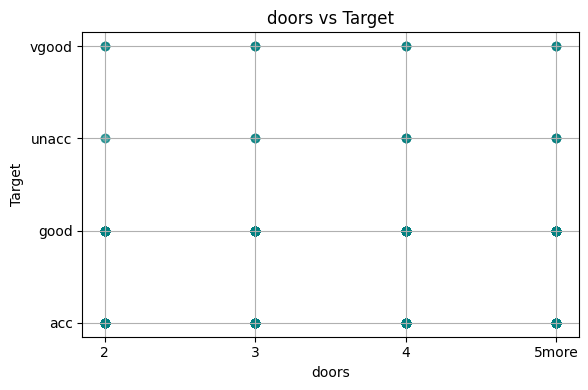

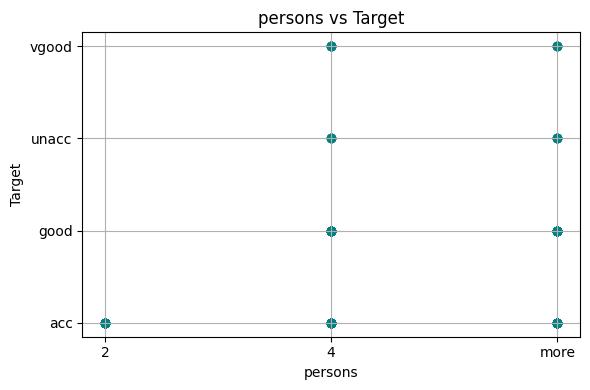

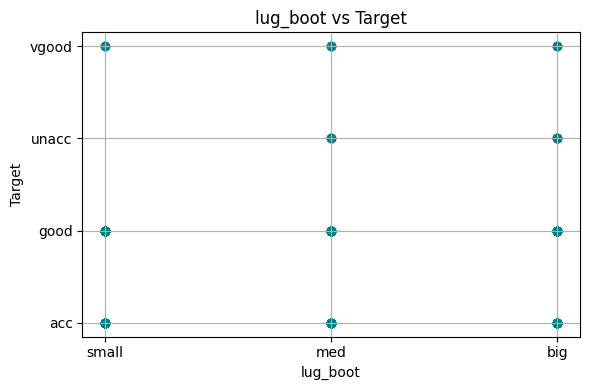

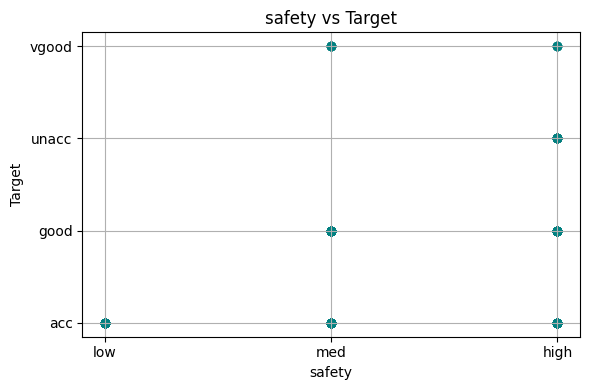

In [6]:
#DATA VISUALIZATION


for col in df_features.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(df_features[col], df_target, alpha=0.1, color='teal')
    #use the id for yticks and the label for label on y axis
    plt.yticks(ticks=list(inverse_mapping.keys()),labels=[inverse_mapping[i] for i in inverse_mapping])

    plt.xlabel(col)
    plt.ylabel("Target")
    plt.title(f"{col} vs Target")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [7]:
#TRAINING THE MODEL


#using Decision Tree Classifier and tuning its parameters we got the following best possible parameters
model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42,class_weight='balanced')
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [8]:
#EVALUATING MODEL


#making predictions on the test set

y_pred = model.predict(X_test)

#checking various metrics to evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.9479768786127167
Confusion Matrix:
 [[ 67  13   3   0]
 [  0  10   0   1]
 [  0   0 235   0]
 [  1   0   0  16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.81      0.89        83
           1       0.43      0.91      0.59        11
           2       0.99      1.00      0.99       235
           3       0.94      0.94      0.94        17

    accuracy                           0.95       346
   macro avg       0.84      0.91      0.85       346
weighted avg       0.97      0.95      0.95       346



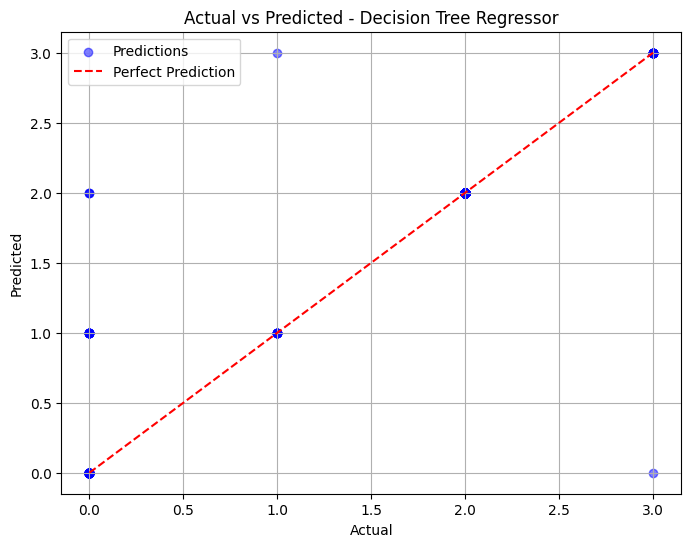

In [9]:
#DATA VISUALIZATION



# Scatter plot of predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.5, label='Predictions')

# Perfect prediction line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')



# Labels and title
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Decision Tree Regressor")
plt.grid(True)
plt.legend()
plt.show()